<a href="https://colab.research.google.com/github/Hakimvira/mlProject/blob/master/Fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Default

In [ ]:
!pip install kaggle
from fastai.vision.all import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
creds = '{"username":"hakimvira","key":"73c7f0cfe380fbebe0fa74ad1b3e781f"}'

In [ ]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

Create directory

In [ ]:
folder = 'fruits360'
path = URLs.path(folder)

Download Datasets

In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download("https://www.kaggle.com/datasets/moltean/fruits")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hakimvira
Your Kaggle Key: ··········


100%|██████████| 1.28G/1.28G [00:07<00:00, 185MB/s]


Check files

In [ ]:
path = Path( './fruits/')
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('fruits-360_dataset'),Path('fruits-360-original-size')]

In [ ]:
(path/"fruits-360_dataset"/"fruits-360"/"Training").ls()

(#131) [Path('fruits-360_dataset/fruits-360/Training/Grape White 4'),Path('fruits-360_dataset/fruits-360/Training/Potato White'),Path('fruits-360_dataset/fruits-360/Training/Pepper Green'),Path('fruits-360_dataset/fruits-360/Training/Apple Pink Lady'),Path('fruits-360_dataset/fruits-360/Training/Plum 2'),Path('fruits-360_dataset/fruits-360/Training/Pear Williams'),Path('fruits-360_dataset/fruits-360/Training/Clementine'),Path('fruits-360_dataset/fruits-360/Training/Passion Fruit'),Path('fruits-360_dataset/fruits-360/Training/Strawberry'),Path('fruits-360_dataset/fruits-360/Training/Potato Sweet')...]

In [ ]:
images = get_image_files(path/"fruits-360_dataset"/"fruits-360"/"Training")
images

(#67692) [Path('fruits-360_dataset/fruits-360/Training/Grape White 4/265_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/r_33_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/r_40_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/28_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/r_92_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/r_137_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/144_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/248_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/r_114_100.jpg'),Path('fruits-360_dataset/fruits-360/Training/Grape White 4/232_100.jpg')...]

Check Corrupted Images

In [ ]:
failed = verify_images(images)

In [ ]:
failed

(#0) []

Get test data

In [ ]:
testData = get_image_files(path/"fruits-360_dataset"/"fruits-360"/"Test")
testData

(#22688) [Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_22_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_70_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_286_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/297_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/104_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_253_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/218_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_39_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/r_55_100.jpg'),Path('fruits-360_dataset/fruits-360/Test/Grape White 4/43_100.jpg')...]

In [ ]:
failedTest = verify_images(testData)
failedTest

(#0) []

Create Dataloader

In [ ]:
fruits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    #splitter=RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = fruits.dataloaders(path/"fruits-360_dataset"/"fruits-360"/"Training")

In [ ]:
dls.test_dl(testData, with_labels=True)

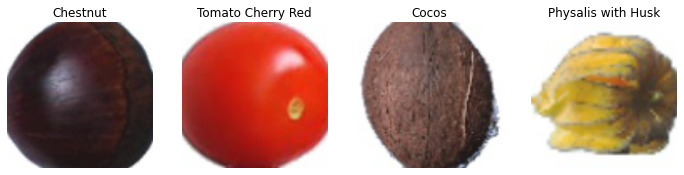

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.271482,0.031558,0.009233,03:11


epoch,train_loss,valid_loss,error_rate,time
0,0.075929,0.007803,0.002511,03:40
1,0.031898,0.001546,0.000369,03:40
2,0.007853,0.000095,0.000000,03:44
3,0.002909,0.000009,0.000000,03:42


Check for errors

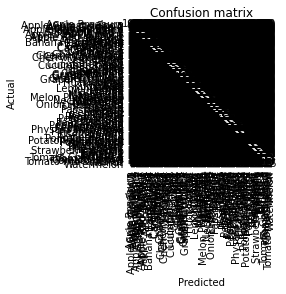

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

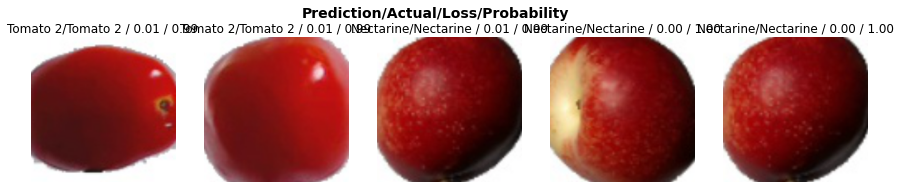

In [ ]:
interp.plot_top_losses(5, nrows = 1)

Save model

In [ ]:
savePath = Path('./drive/MyDrive/ml')
learn.path = Path('')
learn.export()


load model

In [ ]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict(path/"fruits-360_dataset"/"fruits-360"/"Training"/"Grape White 4"/"265_100.jpg")


('Grape White 4',
 TensorBase(49),
 TensorBase([1.4592e-15, 6.2471e-18, 3.6446e-17, 2.1696e-13, 2.1203e-12,
             3.9210e-10, 2.0461e-15, 4.2418e-15, 2.0779e-13, 3.7944e-15,
             4.0833e-10, 6.3273e-15, 5.7219e-11, 2.8304e-16, 5.2982e-14,
             2.8450e-15, 3.4135e-12, 1.5621e-14, 2.4207e-15, 2.5218e-15,
             4.0526e-16, 7.0415e-13, 1.0362e-14, 2.8743e-13, 6.2027e-16,
             1.2672e-13, 1.0278e-12, 5.0891e-15, 2.7211e-16, 1.0941e-13,
             4.6050e-11, 5.8805e-12, 7.9623e-13, 2.3335e-13, 8.1998e-14,
             3.5038e-17, 2.7072e-13, 1.9647e-15, 5.2712e-17, 8.9132e-15,
             5.0801e-15, 1.5759e-16, 1.6765e-15, 1.7690e-14, 2.4383e-08,
             3.4142e-13, 6.9826e-12, 7.4237e-11, 5.3244e-11, 1.0000e+00,
             1.3127e-16, 1.5925e-15, 1.4461e-14, 7.2342e-12, 1.6067e-12,
             6.8584e-15, 3.2649e-15, 6.3662e-13, 2.1602e-16, 3.8652e-18,
             1.0877e-17, 5.3905e-13, 3.5249e-15, 3.2012e-16, 1.1030e-13,
             3.0